1.Download Data And Import 

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


2.Load Dataset

In [3]:
data=pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


3.Visualizations

In [4]:
import matplotlib.pyplot as plt


Univariate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bdbd3dd90>]],
      dtype=object)

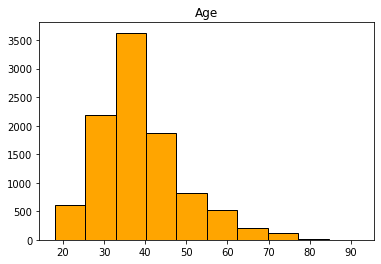

In [5]:
data.hist(column='Age',grid=False,edgecolor='black',color="Orange")

Bi-Variate

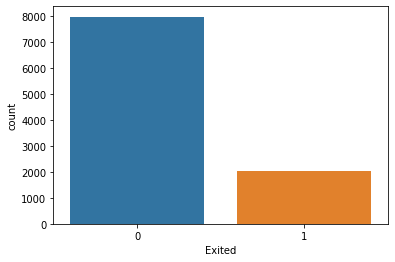

In [6]:
sns.countplot(x='Exited',data=data)

Multi-Variate

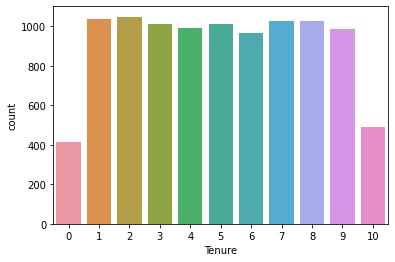

In [7]:
sns.countplot(x="Tenure",data=data)

4. Descripitive Statistics

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5. Handle Missing Values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


6. Outliners & Replace

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


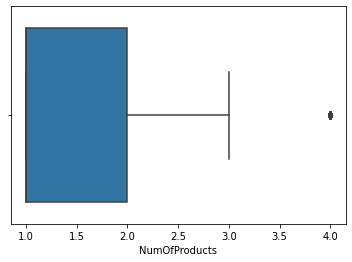

In [10]:
sns.boxplot(data['NumOfProducts'])

In [11]:
out=np.where(data['NumOfProducts']>3)
out

(array([   7,   70, 1254, 1469, 1488, 1701, 1876, 2124, 2196, 2285, 2462,
        2499, 2509, 2541, 2614, 2617, 2872, 3152, 3365, 3841, 4013, 4014,
        4166, 4260, 4403, 4511, 4516, 4606, 4654, 4748, 4822, 5010, 5137,
        5235, 5386, 5700, 5904, 6150, 6172, 6279, 6750, 6875, 7257, 7457,
        7567, 7698, 7724, 7729, 8041, 8590, 8683, 8850, 8923, 9215, 9255,
        9323, 9370, 9411, 9540, 9565]),)

In [12]:
for i in out:
    data['NumOfProducts'][i]=3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


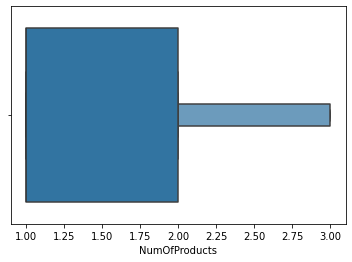

In [13]:
sns.boxenplot(data['NumOfProducts'])

7. Categorical Columns and Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [15]:
data["Surname"]=lab.fit_transform(data["Surname"])
data['Geography']=lab.fit_transform(data['Geography'])
data['Gender']=lab.fit_transform(data['Gender'])

In [16]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


8.Split into Dependent and Independent Data

In [17]:
x=data.iloc[:,3:13]
y=data.iloc[:,13]

9. Scale independent variables

In [18]:
x=x.drop(['Geography','Gender'],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

10. Split Into Testing and Training Data

In [20]:
from sklearn.model_selection import train_test_split
# Split to test and train data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)

In [21]:
xtrain.shape,xtest.shape

((6700, 8), (3300, 8))

In [22]:
xtrain,xtest

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 8371          813   29       5  106059.40              1          0   
 5027          681   37       8   73179.34              2          1   
 9234          642   49       4  120688.61              1          1   
 3944          612   31       8  117989.76              1          1   
 6862          586   33       9       0.00              1          1   
 ...           ...  ...     ...        ...            ...        ...   
 5734          768   54       8   69712.74              1          1   
 5191          682   58       1       0.00              1          1   
 5390          735   38       1       0.00              3          0   
 860           667   43       8  190227.46              1          1   
 7270          697   51       1  147910.30              1          1   
 
       IsActiveMember  EstimatedSalary  
 8371               0        187976.88  
 5027               1         25292.53  
 9234      